In [1]:
using DataFrames,PythonPlot,StatsBase,Random,Distributions,CSV
PythonPlot.svg(true)
include("model.jl")

FIG_PATH = "/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/Finite Lineages Plos Journal/paper/figures"

"/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/Finite Lineages Plos Journal/paper/figures"

In [150]:
d = 2
A = [-1.0 0.0; 0.0 -1.0]
Γ = [0.1 0.0; 0.0 0.0]
B = [-2 0.2; 0.0 0.0]
u = [0.8,0.0]
v = [1.0,0.0]
params = (A,B,u,v,Γ)
init = [0.1, 0.0, 0.0, 0.0]
dt = 0.01
T =200
df = make_sim_df(init, params, dt, T);


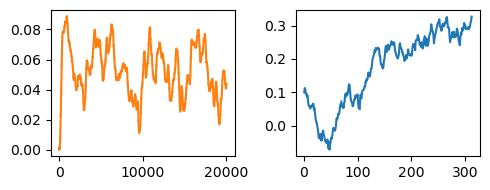

In [151]:
fig,axs = subplots(figsize=(5,2),ncols=2)

ax = axs[0]
for i in unique(df.cell)
    d = df[df.cell .== i,:]
    #ax.plot(d.time,exp.(d.Z + log(2)*d.θ),"C0")
    ax.plot(d.time,d.z,"C1")   
end
#ax.set_ylim([-0.5,3.5])

ax = axs[1]
#ax.plot(df.time,df.y)
for i in unique(df.cell)[1:5]
    d = df[df.cell .== i,:]
    ax.plot(d.time,d.x1,"C0")
    #ax.plot(d.time,d.x2,"C1")   
end

tight_layout()
fig

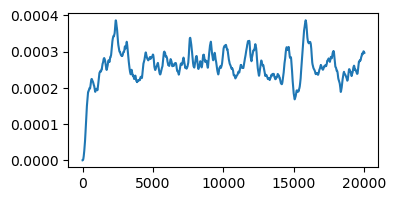

In [53]:
fig,ax = subplots(figsize=(4,2))
v = var(hcat([make_sim_df(init, params, dt, T).z for i in 1:100]...),dims=2);
ax.plot(v)
fig

In [147]:
dfs = []
T =1000
B = [-2 0.1; 0.0 0.0]
brange = collect(0.01:0.02:2.)
for b in brange
    params = (A,.- B,[b,0.0],[0.5,0],Γ)
    init = [0.1, 0.0, 0.0, 0.0]
    df = make_sim_df(init, params, dt, T)
    push!(dfs,df)
end

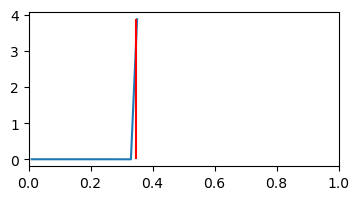

In [149]:

vs = [var(d.z[100:end]) for d in dfs]
fig,ax = subplots(figsize=(4,2))
ax.plot(brange[vs .< 10],vs[vs .< 10],"-")
ax.vlines(log(2)*0.5,0,maximum(vs[vs .< 10]),"r")
ax.set_xlim([0,1])
#ax.set_ylim([10e-5,1])
fig